# Graphiques

In [1]:
# If you use the IPython notebook :
# this line tell IPython to plot figures 
# directly in the notebook, not in a separate figure
%matplotlib inline

At the contrary to languages like Matlab or IDL, the support of plotting capabilities is not built-in in Python and requires an external library.

The workhorse for scientific plotting in Python is _matplotlib_. (http://matplotlib.org)

The matplotlib library has been built in order to be close to the Matlab commands, and most of the command are the same.

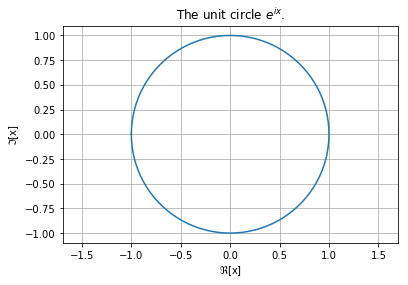

In [2]:
# The code below is the "proper" way to developp a Python code
# which may be used somewhere else...
import numpy as np # NumPy
import matplotlib.pyplot as plt # Matplotlib

x = np.linspace(-np.pi, np.pi, 101)
y = np.exp(-1j*x)

plt.plot(np.real(y), np.imag(y))
plt.axis('equal')
plt.xlabel('$\Re$[x]')
plt.ylabel('$\Im$[x]')
plt.grid(True) # or grid('on') like in Matlab
plt.title('The unit circle $e^{i x}$.')

(array([-1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,
         1.  ,  1.25]), <a list of 11 Text yticklabel objects>)

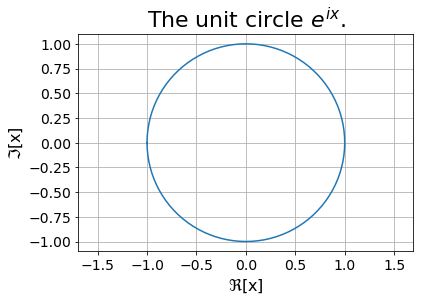

In [3]:
# meme exemple mais sans devoir taper plein de trucs...
from numpy import * # NumPy
from matplotlib.pyplot import * # Matplotlib

x = linspace(-pi, pi, 101)
y = exp(-1j*x)

plot(real(y), imag(y))
axis('equal')
xlabel('$\Re$[x]', fontsize=16)
ylabel('$\Im$[x]', fontsize=16)
grid(True) # or grid('on') like in Matlab
title('The unit circle $e^{i x}$.', fontsize=22)
xticks(fontsize=14)
yticks(fontsize=14)

## Pylab mode
Typing `plt.` and `np.` can be cumbersome, especially in a hurry... (but is recommanded for code which are more than just snippets) To alleviate, one can import most of the matplotlib, numpy and scipy libraries into the interpreter namespace :

    from pylab import * 
(ou, dans un terminal IPython en mode interactif:

    %pylab

**But beware**! Doing like that, you don't know exactly what you've imported (and eventually overwritten) in the memory !

**Example**: which sum() are we now using: the Python native sum() which takes Python list or the NumPy version which takes NumPy array? Same for min() or max().


In [4]:
# In IPython :
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


C:\Users\JH218595\Documents\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['draw_if_interactive']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


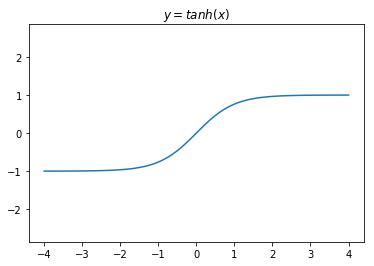

In [5]:
# The code below very much looks like matlab !
x = linspace(-4, 4, 101)
y = tanh(x)
plot(x,y)
axis('equal')
title('$y=tanh(x)$')

## Commandes et options de Matplotlib

C:\Users\JH218595\Documents\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: divide by zero encountered in true_divide


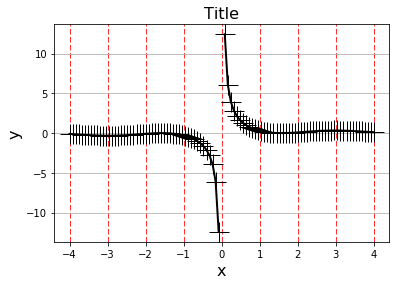

In [6]:
# As in matlab, the line properties can be ajusted, 
# either graphically using the GUI (for independant plots)
# or with commands
plot(x, cos(x)**2 /x, linewidth=2, color='k', 
     marker='+', markersize=20)
grid(axis='y')
grid(axis='x', color='r', linestyle='--')
xlabel('x', fontsize=16)
ylabel('y', fontsize=16)
title('Title', fontsize=16)

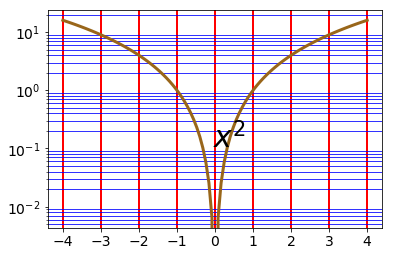

In [7]:
plot(x, x**2, color=(0.6, 0.4, 0.1), lw=3)
yscale('log')
grid(which='minor', color='b', axis='both', linestyle='-')
grid(which='major', color='r', axis='x', linewidth=2 )
xticks(fontsize=14) 
yticks(fontsize=14)
text(-0.05, 0.1, '$x^2$', fontsize=30)

(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 6 Text yticklabel objects>)

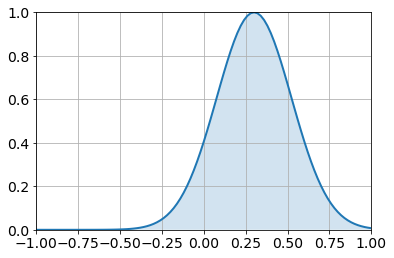

In [8]:
x = linspace(-1, 1, 101)
y = exp(-(x - 0.3)**2 / 0.1)
plot(x, y, lw=2)
fill_between(x, y, alpha=0.2)
axis([-1, 1, 0, 1], 'equal')
grid(True) # or grid('on')
xticks(fontsize=14); yticks(fontsize=14)

Making subplot can be done the same way than in Matlab:

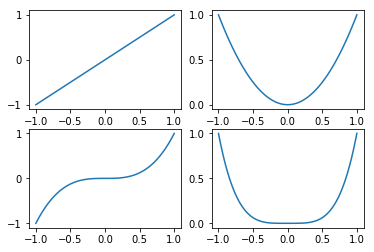

In [9]:
subplot(221)
plot(x, x**1)
subplot(222)
plot(x, x**2)
subplot(223)
plot(x, x**3)
subplot(224)
plot(x, x**4)

Or a more "Pythonic" way : (cf http://matplotlib.org/examples/pylab_examples/subplots_demo.html for more examples)

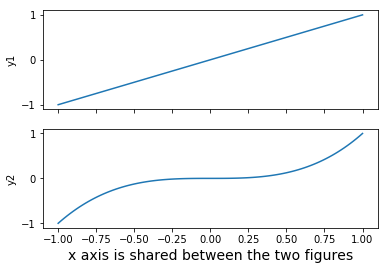

In [10]:
f, ax = subplots(nrows=2, ncols=1, sharex=True)
ax[0].plot(x, x**1)
ax[1].plot(x, x**3)

ax[0].set_ylabel('y1')
ax[1].set_ylabel('y2')

xlabel('x axis is shared between the two figures', fontsize=14)

## 2D figure

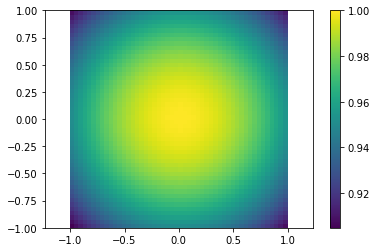

In [11]:
# generates a quadrilateral grid
u = linspace(-1, 1, 51)
X,Y = meshgrid(u, u)
# a gaussian
Z = exp(-(X**2 + Y**2)/20)

pcolor(X, Y, Z)
axis('equal')
cbar = colorbar()

See [here](http://thomas-cokelaer.info/blog/2014/05/matplotlib-difference-between-pcolor-pcolormesh-and-imshow/) for a discussion of the differences between `pcolor`, `pcolormesh` (hint: much faster) and `imshow` (hint: start at upper left).

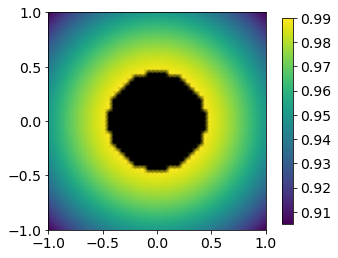

In [12]:
# below we tune a bit the colorbar
C = pcolormesh(X, Y, Z, shading='gouraud', vmax=0.99, cmap='viridis')
C.cmap.set_over('black')

C.axes.tick_params(labelsize=14)
C.axes.set_aspect('equal', adjustable='box')

cbar = colorbar(orientation='vertical', aspect=20, shrink=0.95)
cbar.ax.tick_params(labelsize=14) 

You can find [here](http://bids.github.io/colormap/) some discussion about the colormar used in present and future versions of Matplotlib.

## How to make ... ?

Matplotlib is now a very mature library, which allows users to perform many kind of different graphics type.

Please have a look the [Matplotlib Gallery](http://matplotlib.org/gallery.html) to discover the various possibilities!


In [13]:
from IPython import utils  
from IPython.core.display import HTML  
import os  
def css_styling():  
    """Load the CSS sheet 'custom.css' located in the directory"""
    styles = "<style>\n%s\n</style>" % (open('./custom.css','r').read())
    return HTML(styles)
css_styling()  